In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv("rainfall.csv",header=0, index_col=0)
df.head()

,Rainfall
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


<Axes: xlabel='Month'>

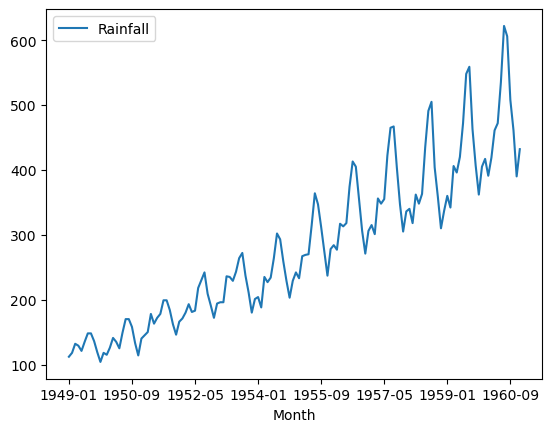

In [45]:
df.plot()

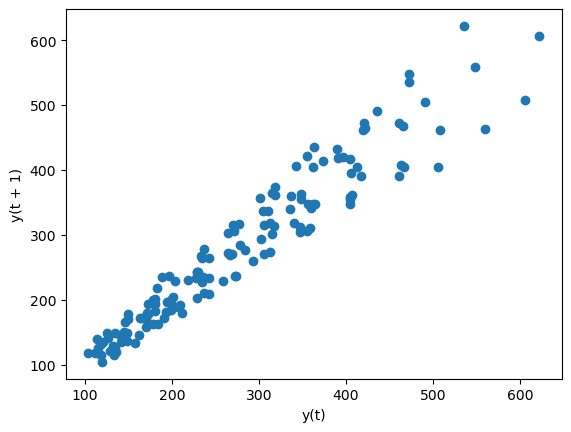

In [46]:
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

In [47]:
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.960195
t+1  0.960195  1.000000


[]

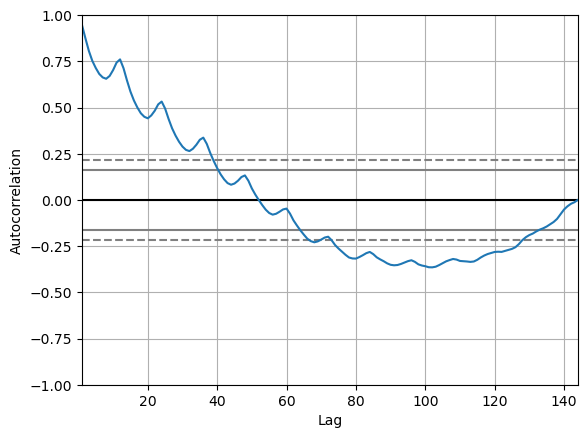

In [34]:
pd.plotting.autocorrelation_plot(df)
plt.plot()

In [37]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [39]:
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 4.40999915  0.54377634  0.31837725 -0.02344532 -0.09328385  0.23085169
 -0.15420365  0.09373805 -0.09291185  0.32015708 -0.46668114  0.05145669
  0.73075956 -0.25128548 -0.33381625  0.242229   -0.15796594 -0.09420813
 -0.08006763  0.05655165 -0.06648343 -0.14659542  0.29515085  0.24214347
  0.09150113 -0.02924769 -0.36689735 -0.01890586  0.12110732  0.0568705 ]


In [40]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=552.536526, expected=535.000000
predicted=632.633224, expected=622.000000
predicted=629.130658, expected=606.000000
predicted=527.457734, expected=508.000000
predicted=432.252914, expected=461.000000
predicted=399.961090, expected=390.000000
predicted=424.926456, expected=432.000000
Test RMSE: 18.165


/var/folders/mk/jnk860zs48z0qdh8wn84cb400000gn/T/ipykernel_4056/714983665.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (predictions[i], test[i]))


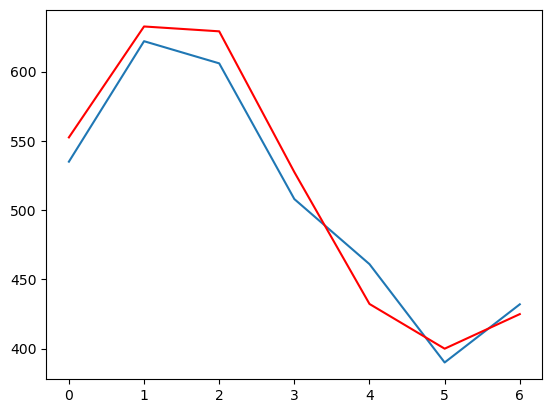

In [42]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()